<div style='background-color: #72b356; color: #ffffff; padding: 20px 40px; text-align: center;'>
    <h1 style='font-size: 42px; padding: 0px; margin: 0px; margin-bottom: 5px;'>Project</h1>
    <h2 style='font-size: 24px; padding: 0px; margin: 0px;'>MODS202 - Econometrics (S1-P1)</h2>
    <h3 style='font-size: 12px;'>Mauro Parafati <span style="font-style: italic;">(mauro.parafati at telecom-paris.fr)</span></h3>
    <h3 style='font-size: 12px;'>Rodrigo Calzada <span style="font-style: italic;">(rodrigo.calzada at telecom-paris.fr)</span></h3>
</div>

<div style='background-color: #ffffff; color: #72b356; border: 5px solid #72b356; padding: 20px 40px;'>
    <h1 style='font-size: 32px; padding: 0px; margin: 0px;'>Table of Contents</h1>
</div>

* [Setup](#Setup)
* [Part 1: Regression](#Part-1)
    * [Statement](./Part_1.pdf)
    * Questions: [1.1](#Question-1.1), [1.2](#Question-1.2), [1.3](#Question-1.3), [1.4](#Question-1.4), [1.5](#Question-1.5), [1.6](#Question-1.6), [1.7](#Question-1.7), [1.8](#Question-1.8), [1.9](#Question-1.9), [1.10](#Question-1.10), [1.11](#Question-1.11), [1.12](#Question-1.12), [1.13](#Question-1.13), [1.14](#Question-1.14), [1.15](#Question-1.15), [1.16](#Question-1.16).
* [Part 2: Time series](#Part-2)
    * [Statement](./Part_2.pdf)
    * Questions: [2.1](#Question-2.1), [2.2](#Question-2.2), [2.3](#Question-2.3), [2.4](#Question-2.4), [2.5](#Question-2.5), [2.6](#Question-2.6), [2.7](#Question-2.7), [2.8](#Question-2.8), [2.9](#Question-2.9), [2.10](#Question-2.10), [2.11](#Question-2.11).

<div style='background-color: #ffffff; color: #3b3b3b; border: 5px solid #3b3b3b; padding: 20px 40px;'>
    <h1 style='font-size: 32px; padding: 0px; margin: 0px;'>Setup</h1>
</div>

<h3 style='color: #3b3b3b;'>Imports</h3>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.ar_model import ar_select_order as ARSelectOrder
from statsmodels.tsa.api import AutoReg
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import t

<h3 style='color: #3b3b3b;'>Libraries</h3>

In [49]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


<h3 style='color: #3b3b3b;'>Constants</h3>

In [50]:
FILEPATH_1 = 'MROZ.txt'
FILEPATH_2 = 'quarterly.xls'

<div style='background-color: #ffffff; color: #026be3; border: 5px solid #026be3; padding: 20px 40px;'>
    <h1 style='font-size: 32px; padding: 0px; margin: 0px; margin-bottom: 5px;'>Part 1</h1>
    <h2 style='font-size: 20px; padding: 0px; margin: 0px; font-style: italic;'>Regression</h2>
</div>

*[Click here](./Part_1.pdf) to open the statement provided by the teacher*

<h3 style='color: #026be3;'>Question 1.1</h3>
<h4 style='color: #026be3;'>Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.</h4>

In [51]:
raw_data = pd.read_csv(FILEPATH_1, delim_whitespace=True, header=None)

In [52]:
# Variable wage = column 6
data = raw_data.loc[raw_data[6] != '.']
data = data.astype({6:'float'})
data = data.loc[data[6] > 0]
data[6]

0      3.3540
1      1.3889
2      4.5455
3      1.0965
4      4.5918
        ...  
423    2.3118
424    5.3061
425    5.8675
426    3.4091
427    4.0816
Name: 6, Length: 428, dtype: float64

<h3 style='color: #026be3;'>Question 1.2</h3>
<h4 style='color: #026be3;'>Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon.</h4>

In [53]:
# Wage = Column 6
# Age = Column 4
# Education = Column 5

### All women

In [54]:
# Wage
data[6].describe()

count    428.000000
mean       4.177682
std        3.310282
min        0.128200
25%        2.262600
50%        3.481900
75%        4.970750
max       25.000000
Name: 6, dtype: float64

In [55]:
# Age
data[4].describe()

count    428.000000
mean      41.971963
std        7.721084
min       30.000000
25%       35.000000
50%       42.000000
75%       47.250000
max       60.000000
Name: 4, dtype: float64

In [56]:
# Education
data[5].describe()

count    428.000000
mean      12.658879
std        2.285376
min        5.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       17.000000
Name: 5, dtype: float64

### Women whose husband has a higher wage than the median

In [57]:
# Men wages = Column 11
husb_higher_med = data.loc[data[5] > data[5].median()]
# husb_higher_med[]

In [58]:
# Wage
husb_higher_med[6].describe()

count    144.000000
mean       5.349451
std        3.547190
min        0.170900
25%        2.960850
50%        4.660750
75%        7.035675
max       22.500000
Name: 6, dtype: float64

In [59]:
# Age
husb_higher_med[4].describe()

count    144.000000
mean      41.930556
std        8.060655
min       30.000000
25%       35.000000
50%       42.500000
75%       47.000000
max       60.000000
Name: 4, dtype: float64

In [60]:
# Education
husb_higher_med[5].describe()

count    144.000000
mean      15.208333
std        1.518534
min       13.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: 5, dtype: float64

### Women whose husband has a lower wage than the median

In [61]:
# Men wages = Column 11
husb_lower_med = data.loc[data[5] < data[5].median()]
husb_lower_med

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
11,1,1960,0,1,42,11,4.5918,4.58,2375,47,...,28700,0.6215,14,7,5.0,0,14,19.70007,1.524272,196
14,1,1848,0,1,43,10,3.6797,3.38,2024,45,...,31431,0.5815,7,7,7.5,1,6,24.63091,1.302831,36
15,1,1224,0,3,35,11,1.3472,0.00,1694,38,...,19180,0.7215,16,10,7.5,1,9,17.53103,.2980284,81
30,1,1040,0,0,50,11,1.5385,0.00,1840,53,...,6719,0.7515,7,7,7.5,1,32,5.11896,.4308079,1024
35,1,690,0,1,42,11,2.4638,0.00,1896,44,...,15897,0.7515,10,3,7.5,0,0,14.19698,.9017048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1,800,0,1,48,8,3.8250,2.30,2000,52,...,62060,0.7515,7,7,7.5,0,2,59.00000,1.341558,4
409,1,778,0,0,47,8,3.2134,7.25,2058,51,...,31810,0.6915,12,12,5.0,1,11,29.30997,1.16733,121
417,1,1350,0,4,37,8,1.7407,2.10,2400,41,...,15100,0.7515,7,7,3.0,0,4,12.75006,.5542873,16
419,1,1984,1,3,36,11,4.4859,3.26,1656,38,...,19600,0.7215,7,3,14.0,0,10,10.69998,1.500939,100


In [62]:
# Wage
husb_lower_med[6].describe()

count    72.000000
mean      2.945771
std       2.340912
min       0.128200
25%       1.768525
50%       2.456100
75%       3.671450
max      18.267000
Name: 6, dtype: float64

In [63]:
# Age
husb_lower_med[4].describe()

count    72.000000
mean     42.847222
std       7.648363
min      30.000000
25%      36.000000
50%      42.500000
75%      48.250000
max      59.000000
Name: 4, dtype: float64

In [64]:
# Education
husb_lower_med[5].describe()

count    72.000000
mean      9.500000
std       1.472757
min       5.000000
25%       8.750000
50%      10.000000
75%      11.000000
max      11.000000
Name: 5, dtype: float64

<h3 style='color: #026be3;'>Question 1.3</h3>
<h4 style='color: #026be3;'>Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez.</h4>

array([[<AxesSubplot:title={'center':'6'}>]], dtype=object)

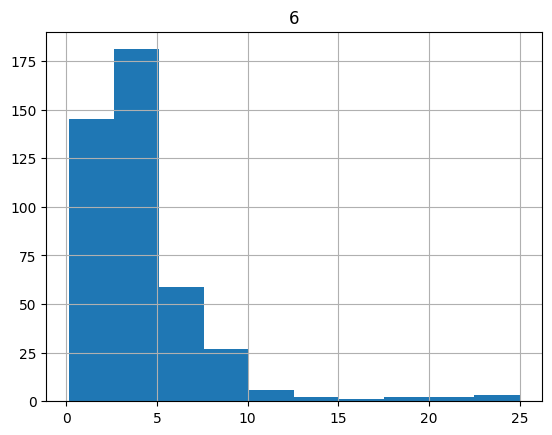

In [65]:
data.hist(6)

<Figure size 640x480 with 0 Axes>

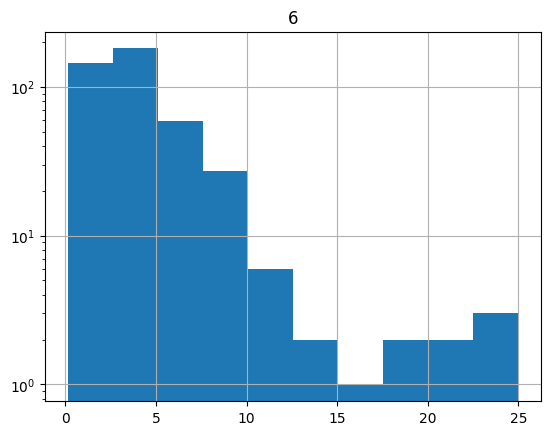

In [66]:
plt.figure()
hist = data.hist(6)
plt.yscale('log')

Both results represent the same information. However, it is easier to appreciate the biggest differences involving high values using the non-log one, while the smallesy ones in lower values is more interpretable in the log graphic.

<h3 style='color: #026be3;'>Question 1.4</h3>
<h4 style='color: #026be3;'>Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?</h4>

# A REVISAR

In [67]:
# motheduc = Column 14
# fatheduc = Column 15

r = np.corrcoef(data[14], data[15])
print(r)

[[1.         0.55406322]
 [0.55406322 1.        ]]


In [68]:
educBoth = data.loc[:,14:15]
r = np.corrcoef(educBoth[14], educBoth[15])
print(r)

[[1.         0.55406322]
 [0.55406322 1.        ]]


Using correlation data, there exists a relation between both father and mother level of education. Taking into account that the value is 0.55406322, which is positive, it is likely that the higher the value of one of the elements, the higher the value of the other.

In [69]:
np.matmul(r.T,r)

array([[1.30698605, 1.10812644],
       [1.10812644, 1.30698605]])

In [70]:
vif= pd.DataFrame()
# data['const']=1
# vif['variables']=data.columns
# vif["VIF"]=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
# print(vif)

<h3 style='color: #026be3;'>Question 1.5</h3>
<h4 style='color: #026be3;'>Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"</h4>

# A REVISAR

<AxesSubplot:xlabel='5', ylabel='6'>

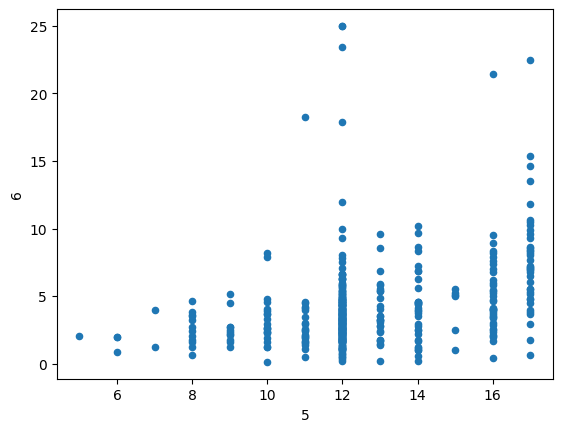

In [71]:
#wage et educ
data.plot.scatter(x=5,y=6)

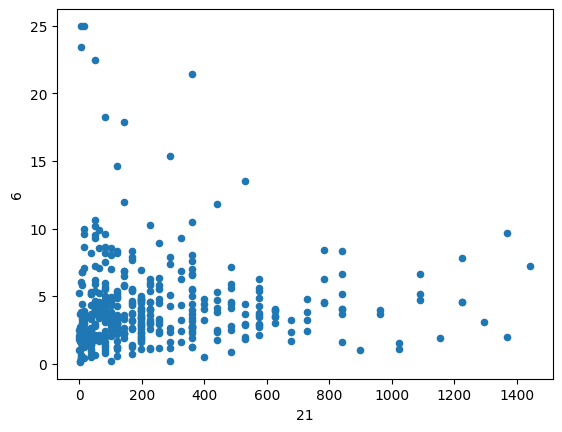

In [72]:
#wage et exper
scat=data.plot.scatter(x=21,y=6)

<AxesSubplot:xlabel='15', ylabel='6'>

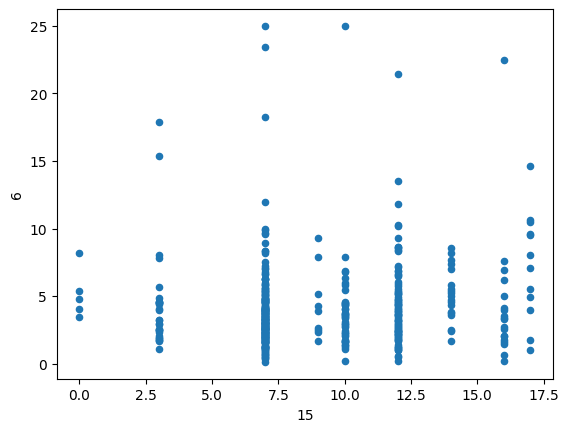

In [73]:
#wage et fatheduc
data.plot.scatter(x=15,y=6)

Although we can see different distributions, it is difficult to obtain conclusions using only the scatter plots because points may be overlapping. However, the wage is differently distributed looking at the evident differences of the graphics.

<h3 style='color: #026be3;'>Question 1.6</h3>
<h4 style='color: #026be3;'>Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.</h4>

We have estimators which are not biased when the residuals of the models are independent of the variables of explanation.

The omitted variable biased happens when we ignore a variable of explanation in the equation and it is correlated with both the error and the studied variable

<h3 style='color: #026be3;'>Question 1.7</h3>
<h4 style='color: #026be3;'>Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.</h4>

In [74]:
# city = Column 17
# educ = Column 5
# exper = Column 18
# nwifeinc = Column 19
# kidslt6 = Column 2
# kidsge6 = Column 3

X = data.iloc[:, [17,5,18,19,2,3]]
X['const'] = 1
y = data[6]
model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.41e-10
Time:                        02:13:44   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
17             0.3698      0.327      1.132      0.2

/tmp/ipykernel_121836/4181789263.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const'] = 1


In [75]:
coef=results.params.to_numpy()
coef

array([ 0.36975203,  0.4600477 ,  0.02381995,  0.01524479,  0.03617319,
       -0.06189091, -2.40345399])

(array([ 23., 190., 172.,  27.,   6.,   3.,   0.,   3.,   1.,   3.]),
 array([-5.90838951, -3.19097286, -0.47355622,  2.24386043,  4.96127707,
         7.67869372, 10.39611037, 13.11352701, 15.83094366, 18.5483603 ,
        21.26577695]),
 <BarContainer object of 10 artists>)

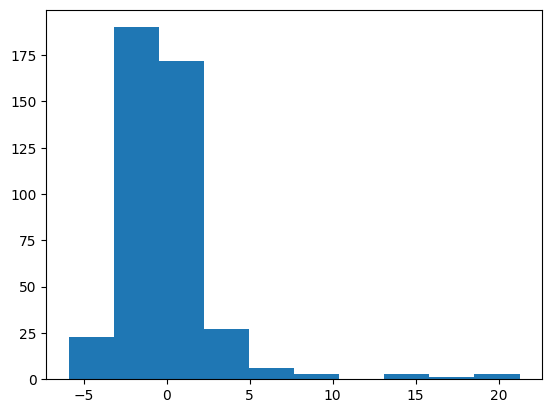

In [76]:
plt.hist(residuals)

# Comment

<h3 style='color: #026be3;'>Question 1.8</h3>
<h4 style='color: #026be3;'>Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7.</h4>

In [77]:
# city = Column 17
# educ = Column 5
# exper = Column 18
# nwifeinc = Column 19
# kidslt6 = Column 2
# kidsge6 = Column 3

X = data.iloc[:, [17,5,18,19,2,3]]
X['const']=1
y_log = np.log(data[6])
model_log = sm.OLS(y_log, X)
results_log = model.fit()
residuals_log = results_log.resid
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.41e-10
Time:                        02:13:44   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
17             0.3698      0.327      1.132      0.2

/tmp/ipykernel_121836/3954646895.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const']=1


In [78]:
coef_log=results_log.params.to_numpy()
coef_log

array([ 0.36975203,  0.4600477 ,  0.02381995,  0.01524479,  0.03617319,
       -0.06189091, -2.40345399])

(array([ 23., 190., 172.,  27.,   6.,   3.,   0.,   3.,   1.,   3.]),
 array([-5.90838951, -3.19097286, -0.47355622,  2.24386043,  4.96127707,
         7.67869372, 10.39611037, 13.11352701, 15.83094366, 18.5483603 ,
        21.26577695]),
 <BarContainer object of 10 artists>)

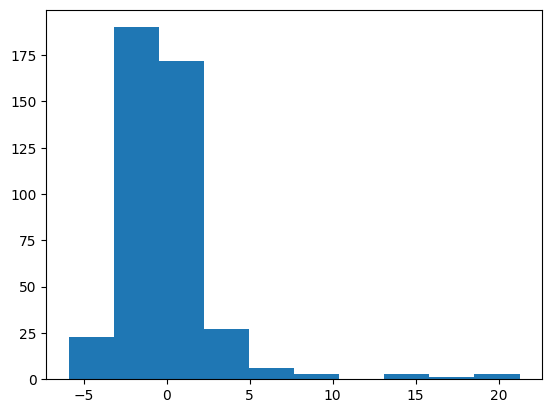

In [79]:
plt.hist(residuals)

# COMMENT

<h3 style='color: #026be3;'>Question 1.9</h3>
<h4 style='color: #026be3;'>Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.</h4>

In [80]:
# city = Column 17
# educ = Column 5
# exper = Column 18
# nwifeinc = Column 19
# kidslt6 = Column 2
# kidsge6 = Column 3

X9 = data.iloc[:, [17,5,18,19,2,3]]
X9['const'] = 1
# LOG ?????????????????????????????????????????????????????????
y = data[6]

/tmp/ipykernel_121836/208939389.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X9['const'] = 1


In [81]:
mat_X = X9.to_numpy()
mat_y = y.to_numpy()
u = mat_y - mat_X@coef
n,k=np.shape(mat_X)
sig22=u.T@u/(n-k)
Var2=sig22*np.linalg.inv(mat_X.T @ mat_X)
std2=np.sqrt(np.diag(Var2))
std2

array([0.32657023, 0.07027516, 0.02087998, 0.01549936, 0.39697399,
       0.12538399, 0.96349591])

In [82]:
# 1%
print(f"Probability density function: {t.ppf(1-0.005,mat_X.shape[0]-mat_X.shape[1]-2)}")
t0=(coef[3]-0)/std2[3]
print(f"t0: {t0}")
print(f"p-values: {t.sf(t0,(mat_X.shape[0]-mat_X.shape[1]-2))*2}")

Probability density function: 2.587613795882378
t0: 0.9835758176929162
p-values: 0.32589171949449613


In [83]:
# 5%
print(f"Probability density function: {t.ppf(1-0.025,mat_X.shape[0]-mat_X.shape[1]-2)}")
t0=(coef[3]-0)/std2[3]
print(f"t0: {t0}")
print(f"p-values {t.sf(t0,(mat_X.shape[0]-mat_X.shape[1]-2))*2}")

Probability density function: 1.9656418415415788
t0: 0.9835758176929162
p-values 0.32589171949449613


In [84]:
# 10%
print(f"Probability density function: {t.ppf(1-0.05,mat_X.shape[0]-mat_X.shape[1]-2)}")
t0=(coef[3]-0)/std2[3]
print(f"t0: {t0}")
print(f"p-values: {t.sf(t0,(mat_X.shape[0]-mat_X.shape[1]-2))*2}")

Probability density function: 1.6484984103848834
t0: 0.9835758176929162
p-values: 0.32589171949449613


We cannot reject the hypothesis with any threshold

<h3 style='color: #026be3;'>Question 1.10</h3>
<h4 style='color: #026be3;'>Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)</h4>

In [85]:
# city = Column 17
# educ = Column 5
# exper = Column 18
# nwifeinc = Column 19
# kidslt6 = Column 2
# kidsge6 = Column 3

X10 = data.iloc[:, [17,5,18,19,2,3]]
X10['const'] = 1
# LOG ?????????????????????????????????????????????????????????
y = data[6]

/tmp/ipykernel_121836/874876369.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X10['const'] = 1


In [86]:
mat_X = X10.to_numpy()
mat_y = y.to_numpy()
u = mat_y - mat_X@coef
n,k=np.shape(mat_X)
sig22=u.T@u/(n-k)
Var2=sig22*np.linalg.inv(mat_X.T @ mat_X)
std2=np.sqrt(np.diag(Var2))
std2

array([0.32657023, 0.07027516, 0.02087998, 0.01549936, 0.39697399,
       0.12538399, 0.96349591])

In [87]:
coef

array([ 0.36975203,  0.4600477 ,  0.02381995,  0.01524479,  0.03617319,
       -0.06189091, -2.40345399])

In [88]:
# 5%, we use 2.5% because we use the two sides test
print(f"Probability density function: {t.ppf(1-0.025,mat_X.shape[0]-mat_X.shape[1]-2)}")
t0=(coef[3]-0.01)/std2[3]
print(f"t0: {t0}")
print(f"p-values: {t.sf(t0,(mat_X.shape[0]-mat_X.shape[1]-2))*2}")

Probability density function: 1.9656418415415788
t0: 0.3383877980792574
p-values: 0.7352404628773813


<h3 style='color: #026be3;'>Question 1.11</h3>
<h4 style='color: #026be3;'>Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.</h4>

In [89]:
# city = Column 17
# educ = Column 5
# exper = Column 18
# nwifeinc = Column 19
# kidslt6 = Column 2
# kidsge6 = Column 3

X11 = data.iloc[:, [17,5,18,19,2,3]]
X11['const'] = 1
y = np.log(data[6])

/tmp/ipykernel_121836/167655595.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X11['const'] = 1


### nwifeinc = 0.01

In [90]:
# Previous?

### city = 0.05

In [91]:
mat_X = X11.to_numpy()
mat_y = y.to_numpy()
u = mat_y - mat_X@coef
n,k=np.shape(mat_X)
sig22=u.T@u/(n-k)
Var2=sig22*np.linalg.inv(mat_X.T @ mat_X)
std2=np.sqrt(np.diag(Var2))
std2

array([0.33762251, 0.07265352, 0.02158663, 0.01602391, 0.41040899,
       0.12962742, 0.99610399])

In [92]:
coef

array([ 0.36975203,  0.4600477 ,  0.02381995,  0.01524479,  0.03617319,
       -0.06189091, -2.40345399])

In [93]:
# 5%, we use 2.5% because we use the two sides test
print(f"Probability density function: {t.ppf(1-0.025,mat_X.shape[0]-mat_X.shape[1]-2)}")
t0=(coef[0]-0.05)/std2[0]
print(f"t0: {t0}")
print(f"p-values: {t.sf(t0,(mat_X.shape[0]-mat_X.shape[1]-2))*2}")

Probability density function: 1.9656418415415788
t0: 0.9470696361133628
p-values: 0.3441491593242192


<h3 style='color: #026be3;'>Question 1.12</h3>
<h4 style='color: #026be3;'>Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez.</h4>

<h3 style='color: #026be3;'>Question 1.13</h3>
<h4 style='color: #026be3;'>Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.</h4>

<h3 style='color: #026be3;'>Question 1.14</h3>
<h4 style='color: #026be3;'>En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.</h4>

<h3 style='color: #026be3;'>Question 1.15</h3>
<h4 style='color: #026be3;'>Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Commentez et donnez les p-valeurs.</h4>

<h3 style='color: #026be3;'>Question 1.16</h3>
<h4 style='color: #026be3;'>Refaire la question 15 en supposant que seuls les rendements de l’éducation et de l’expérience professionnelle changent selon l’âge de la femme. Formuler l’hypothèse H0 et tester-la. Donnez la p-valeur.</h4>

<hr>

<div style='background-color: #ffffff; color: #910c22; border: 5px solid #910c22; padding: 20px 40px;'>
    <h1 style='font-size: 32px; padding: 0px; margin: 0px; margin-bottom: 5px;'>Part 2</h1>
    <h2 style='font-size: 20px; padding: 0px; margin: 0px; font-style: italic;'>Time series</h2>
</div>

*[Click here](./Part_2.pdf) to open the statement provided by the teacher*

<h3 style='color: #910c22;'>Question 2.1</h3>
<h4 style='color: #910c22;'>Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes).</h4>

In [94]:
df = pd.read_excel(FILEPATH_2)

In [95]:
df.head(5)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073


In [96]:
df.tail(3)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187
211,2012Q4,0.16,0.09,0.17,0.69,1.71,202.27,196.20,231.28,114.18,2436.73,30938.8,10319.60,7.83,98.01,13665.4,14505.4,116.089,1147.623


In [97]:
df.shape

(212, 19)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      212 non-null    object 
 1   FFR       212 non-null    float64
 2   Tbill     212 non-null    float64
 3   Tb1yr     212 non-null    float64
 4   r5        212 non-null    float64
 5   r10       212 non-null    float64
 6   PPINSA    212 non-null    float64
 7   Finished  212 non-null    float64
 8   CPI       212 non-null    float64
 9   CPICORE   212 non-null    float64
 10  M1NSA     212 non-null    float64
 11  M2SA      212 non-null    float64
 12  M2NSA     212 non-null    float64
 13  Unemp     212 non-null    float64
 14  IndProd   212 non-null    float64
 15  RGDP      212 non-null    float64
 16  Potent    212 non-null    float64
 17  Deflator  212 non-null    float64
 18  Curr      212 non-null    float64
dtypes: float64(18), object(1)
memory usage: 31.6+ KB


We can see that there are no missing values in this dataset. However, as asked, we make sure of dropping them using `df.dropna()`

In [99]:
df = df.dropna()

We parse the datetimes to a more convenient format using `pd.to_datetime()`

In [100]:
df["DATE"] = pd.to_datetime(df.DATE)

In [101]:
df.head(1)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.2,29.4,18.92,140.53,896.1,299.4,5.13,23.93,2845.3,2824.2,18.521,31.83


We will make sure that the dataset is not missing information from any quarter:

In [102]:
first_date = df.DATE[0]
last_date = df.DATE[df.shape[0] - 1]
qs = pd.date_range(start=first_date, end=last_date, freq='QS')
len(qs.difference(df.DATE))

0

With this result we have shown that there is no value missing for any quarter.

<h3 style='color: #910c22;'>Question 2.2</h3>
<h4 style='color: #910c22;'>Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.</h4>

The formula for computing inflation given the CPI can be written as:

$$inf = 100 * \frac{CPI_{final} - CPI_{initial}}{CPI_{initial}}$$

In [103]:
# Create a new column to get the CPI from the previous quarter
df["prev_CPI"] = df.CPI.shift(1)

In [104]:
df.head(3)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,prev_CPI
0,1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830,NaN
1,1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,29.40
2,1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,29.57


In [105]:
df["inf"] = 100 * ((df.CPI - df.prev_CPI) / df.prev_CPI)

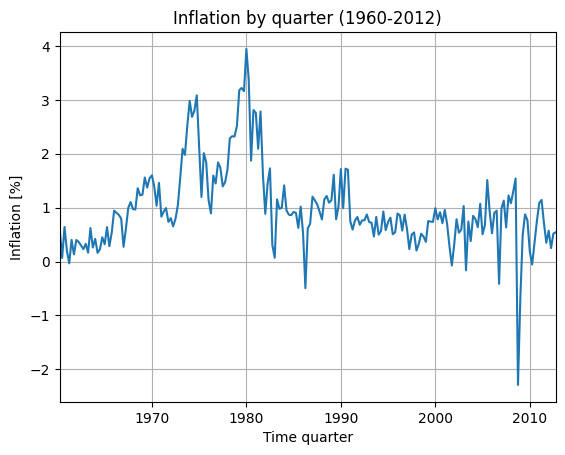

In [106]:
inf = df.inf.to_numpy()[1:]

plt.plot(df.DATE[1:], inf)
plt.title('Inflation by quarter (1960-2012)', fontsize=12)
plt.xlabel('Time quarter')
plt.ylabel('Inflation [%]')
plt.xlim(df.DATE[1], last_date)
plt.grid()
plt.show()

In [107]:
df.inf.min()

-2.2891346065978335

In [108]:
df.inf.describe()

count    211.000000
mean       0.985290
std        0.774504
min       -2.289135
25%        0.541995
50%        0.857677
75%        1.221306
max        3.945811
Name: inf, dtype: float64

In [109]:
min_inf_date = pd.Timestamp(df[df.inf == df.inf.min()].DATE.values[0]).date()
max_inf_date = pd.Timestamp(df[df.inf == df.inf.max()].DATE.values[0]).date()
print(f"Minimum inflation date: {min_inf_date}")
print(f"Maximum inflation date: {max_inf_date}")

Minimum inflation date: 2008-10-01
Maximum inflation date: 1980-01-01


We can observe a general tendency where the inflation is always around 1% by quarter. However, between 1970 and 1980 we find some **peaks of growth**, reaching a **maximum value of almost 4%** by quarter in **1980**. After some research, we may conclude that this was mainly due to oil crisis. Then, we find the **minimum peak in 2008**, probably due to the [collapse of Lehman Brothers](https://www.investopedia.com/articles/economics/09/lehman-brothers-collapse.asp#:~:text=Lehman%20Brothers%20filed%20for%20bankruptcy,the%20financial%20and%20investment%20world.).

<h3 style='color: #910c22;'>Question 2.3</h3>
<h4 style='color: #910c22;'>Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la différence entre ces deux graphiques ?</h4>

The autocorrelogram for `inf` by definition is, given a `lag k`, the autocorrelation between the values of the series that are `k` intervals away.

*Observation: value for lag `k = 0` will always be `1`!*

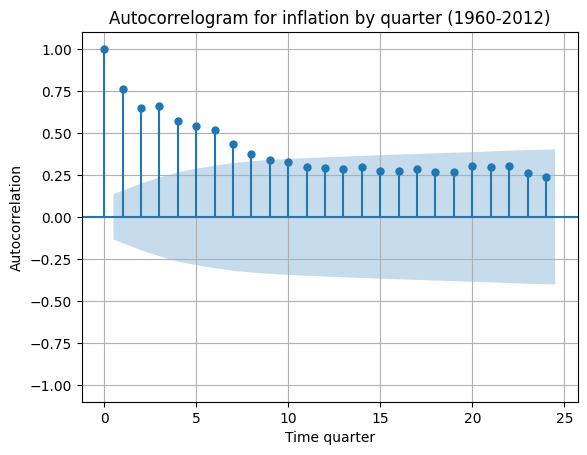

In [110]:
plot_acf(inf)
plt.title('Autocorrelogram for inflation by quarter (1960-2012)', fontsize=12)
plt.xlabel('Time quarter')
plt.ylabel('Autocorrelation')
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

The values outside the blue region have a high statistical confidence (above 95%). We see that there is a high correlation for every value outside this region, in particular, for lag until `k=6` we find that the correlation is higher that 0.5.

Now we are interested in the partial autocorrelagram, that is the same as the autocorrelagram, but taking into account the values for intermediate intervals. This method allows us to mitigate the effects of the observations between `t` and `t - k` (`lag k`), removing indirect correlations included in the autocorrelogram.

*Observation: we can expect, by definition, that for lag `k = 0` and `k = 1`, values will be the same that the ones seen in the previous graphic.*

/home/mparafati/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


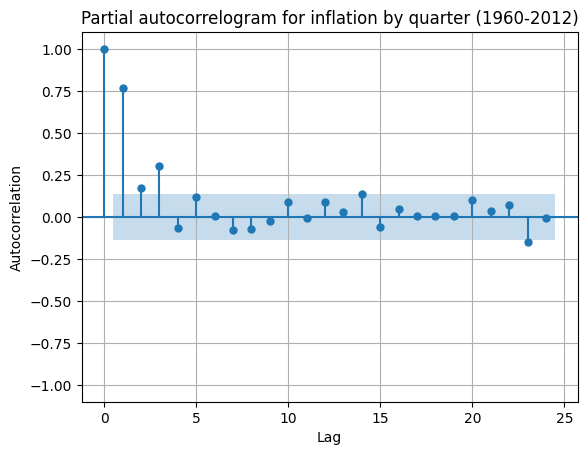

In [111]:
plot_pacf(inf)
plt.title('Partial autocorrelogram for inflation by quarter (1960-2012)', fontsize=12)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

By definition, for any Autoregressive model of order `k`, the partial autocorrelations are 0 for every lag beyond `k`. Given that, in our case, we have values until `k = 3` that are non-zero and outside the blue region (confidence over 95%), we can estimate that inflation can be predicted with a model of order `k = 3`.

<h3 style='color: #910c22;'>Question 2.4</h3>
<h4 style='color: #910c22;'>Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions ?</h4>

In the context of stationary series, we have:

* A **stationary time series** if its properties do not depend on the time at which the series is observed. Future and past are similar.
* A **ergodicity time series** if its statistics can be deduced from any (large enough) random sample given from the process, meaning that they do not depend on the initial conditions.

We need these conditions to be true, since they are the **basic assumptions needed** to perform time series analysis. They are also needed to apply the *ergodic theorem*, which allows us to estimate the expectation of the process given the average of a sufficiently large sample.

<h3 style='color: #910c22;'>Question 2.5</h3>
<h4 style='color: #910c22;'>Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.</h4>

We are building an Auto Regression model for inf, and we want to discover which is the order that maximizes likelihood. From question 3, we are expecting a value of 3 to be the optimal order. However, we are using [`ar_select_order`](https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.ar_select_order.html) from `statsmodel` API for Time Series to check the optimal lag value:

In [112]:
model = ARSelectOrder(inf, maxlag=10, glob=True)
model.ar_lags

[1, 3]

In [113]:
print(model.model.fit().summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  211
Model:              Restr. AutoReg(3)   Log Likelihood                -138.549
Method:               Conditional MLE   S.D. of innovations              0.471
Date:                Sun, 11 Dec 2022   AIC                            285.099
Time:                        02:13:46   BIC                            298.449
Sample:                             3   HQIC                           290.497
                                  211                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1352      0.056      2.394      0.017       0.025       0.246
y.L1           0.5742      0.056     10.321      0.000       0.465       0.683
y.L3           0.2894      0.056      5.207      0.0

<h3 style='color: #910c22;'>Question 2.6</h3>
<h4 style='color: #910c22;'>Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.</h4>

In [114]:
df.head()

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,...,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr,prev_CPI,inf
0,1960-01-01,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,...,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830,NaN,NaN
1,1960-04-01,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,...,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862,29.40,0.578231
2,1960-07-01,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,...,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217,29.57,0.067636
3,1960-10-01,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,...,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624,29.59,0.642109
4,1961-01-01,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,...,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073,29.78,0.201478


We build a model as learned in the course:

In [115]:
unemp = df.Unemp[1:]
y = unemp
const = np.ones(y.shape)
X = np.column_stack((const, inf))

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.912
Time:                        02:13:47   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

The estimated model would be:
$$Unemp = 6.0708 + 0.0159 Inf$$

<h3 style='color: #910c22;'>Question 2.7</h3>
<h4 style='color: #910c22;'>Tester l’autocorrélation des erreurs.</h4>

We will first plot the residuals:

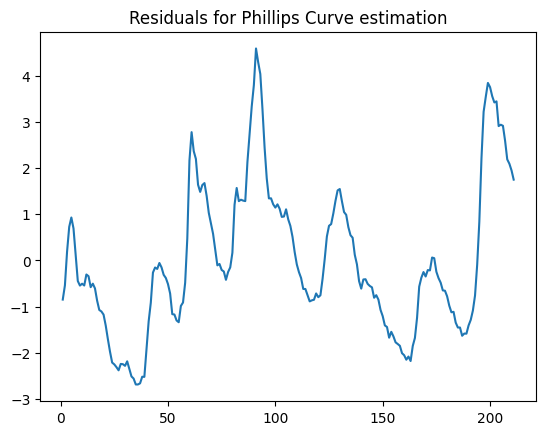

In [116]:
res = results.resid
plt.plot(res)
plt.title('Residuals for Phillips Curve estimation')
plt.show()

From the course results, we know that for a model `AR(1)`, residuals can be written as:
$$u_t = \rho u_{t - 1} + e_t $$

Then, we can set our hypothesis:
$$H_0 : { \rho = 0 };\quad H_1 : { \rho \neq 0 }$$

We build then our model `AR(1)` for the residuals of the Phillips Curve estimation from previous question:

In [117]:
res_model = AutoReg(res, lags=1)
res_results = res_model.fit()
res_results.pvalues

const    0.600587
y.L1     0.000000
dtype: float64


We observe that the p-value for $\rho$ is approximately 0, so we reject the null hypothesis that errors are serially uncorrelated at 5%, to conclude that **they are autocorrelated**.

<h3 style='color: #910c22;'>Question 2.8</h3>
<h4 style='color: #910c22;'>Corriger l’autocorrélation des erreurs par la méthode vue en cours.</h4>

<h3 style='color: #910c22;'>Question 2.9</h3>
<h4 style='color: #910c22;'>Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique (test de changement de structure avant et après la moitié de la période d’observation).</h4>

<h3 style='color: #910c22;'>Question 2.10</h3>
<h4 style='color: #910c22;'>Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de
Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.</h4>

<h3 style='color: #910c22;'>Question 2.11</h3>
<h4 style='color: #910c22;'>Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.</h4>